In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal

def sum_lst(x):
    coefficients = []
    nth_nom = 1
    summ1 = 0
    summ2 = 0
    n = -1
    while abs(nth_nom) >= 1e-8:
        n += 1
        nth_nom = Decimal(((pow(-1,n))*((Decimal(x))**(Decimal(4*n+1))))/(Decimal((Decimal(4*n+1))*Decimal(math.factorial(2*n)))))
        coefficients.append(Decimal(nth_nom))
        if n == 100:
            break

    for i in range(n):
        summ1 += Decimal(coefficients[i])

    
    for i in range(n-1):
        for j in range(n-1-i):
            if Decimal(coefficients[j]) > Decimal(coefficients[j+1]):
                coefficients[j],coefficients[j+1] = Decimal(coefficients[j+1]),Decimal(coefficients[j])
    for i in range(n):
        summ2 += Decimal(coefficients[i])
    res = ['{:.15f}'.format(x),'{:.15f}'.format(n),'{:.15f}'.format(summ1),'{:.15f}'.format(summ2)]
    return res


a = 0
b = 10

In [31]:
data = pd.DataFrame(columns=['x_i','n','sum1','sum2'])



delta = 0.1

t = a
while t<=b:
    data.loc[len(data)] = sum_lst(t)
    t += delta

data['sum1']=data['sum1'].astype(float)
data['sum2']=data['sum2'].astype(float)
data.to_csv('out.csv')

(0.0, 2.0)

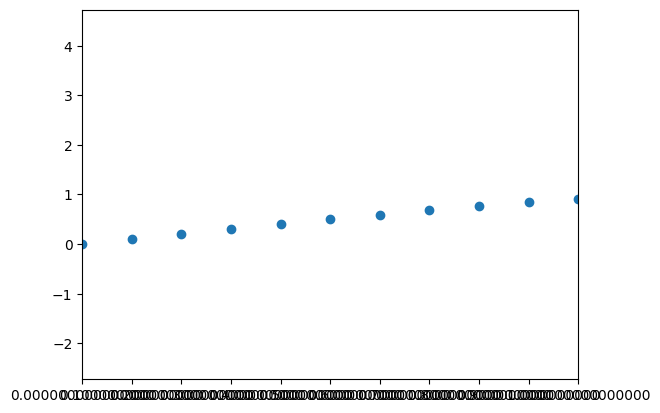

In [32]:
fig,ax = plt.subplots()
plt.scatter(data['x_i'],data['sum1'])

ax.axis('equal')
ax.set_xlim(0,10)
ax.set_ylim(0,2)

<Axes: >

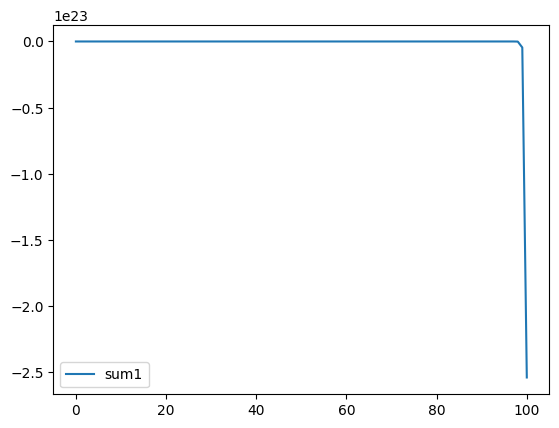

In [33]:
data[['x_i','sum1']].plot()